<a href="https://colab.research.google.com/github/VasylDvorakDS/Items-_pictures_prediction_with_CNN/blob/master/Items__pictures_improved_prediction_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


# Install TensorFlow

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)



Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.15.0


In [2]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

170498071/170498071 [==============================] - 6s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [4]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [5]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [6]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Fit
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 23s 9ms/step - loss: 1.3072 - accuracy: 0.5519 - val_loss: 0.9358 - val_accuracy: 0.6768
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8488 - accuracy: 0.7059 - val_loss: 0.9084 - val_accuracy: 0.6916
Epoch 3/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6955 - accuracy: 0.7604 - val_loss: 0.6678 - val_accuracy: 0.7721
Epoch 4/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5840 - accuracy: 0.7985 - val_loss: 0.7211 - val_accuracy: 0.7647
Epoch 5/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4987 - accuracy: 0.8280 - val_loss: 0.6162 - val_accuracy: 0.7959
Epoch 6/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4168 - accuracy: 0.8572 - val_loss: 0.6824 - val_accuracy: 0.7860
Epoch 7/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3613 - accuracy: 0.8757 - val_loss: 0.6305 - val_ac

In [14]:


# Fit with data augmentation
# Note: if I run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)



Epoch 1/50
1562/1562 [==============================] - 40s 25ms/step - loss: 0.5455 - accuracy: 0.8257 - val_loss: 0.5171 - val_accuracy: 0.8329
Epoch 2/50
1562/1562 [==============================] - 37s 23ms/step - loss: 0.4410 - accuracy: 0.8557 - val_loss: 0.4732 - val_accuracy: 0.8435
Epoch 3/50
1562/1562 [==============================] - 37s 24ms/step - loss: 0.4020 - accuracy: 0.8667 - val_loss: 0.4230 - val_accuracy: 0.8611
Epoch 4/50
1562/1562 [==============================] - 37s 24ms/step - loss: 0.3775 - accuracy: 0.8751 - val_loss: 0.4470 - val_accuracy: 0.8519
Epoch 5/50
1562/1562 [==============================] - 38s 24ms/step - loss: 0.3667 - accuracy: 0.8774 - val_loss: 0.4493 - val_accuracy: 0.8543
Epoch 6/50
1562/1562 [==============================] - 39s 25ms/step - loss: 0.3482 - accuracy: 0.8841 - val_loss: 0.4350 - val_accuracy: 0.8635
Epoch 7/50
1562/1562 [==============================] - 37s 24ms/step - loss: 0.3403 - accuracy: 0.8835 - val_loss: 0.4353 -

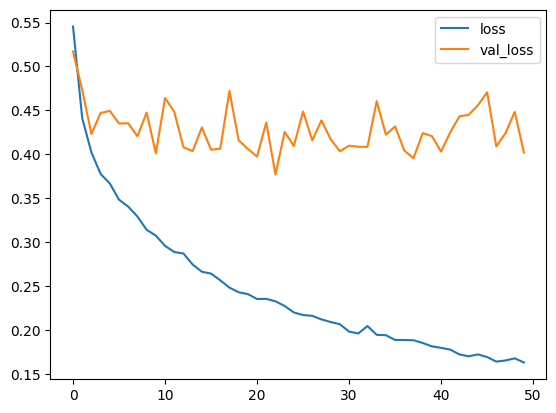

In [15]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

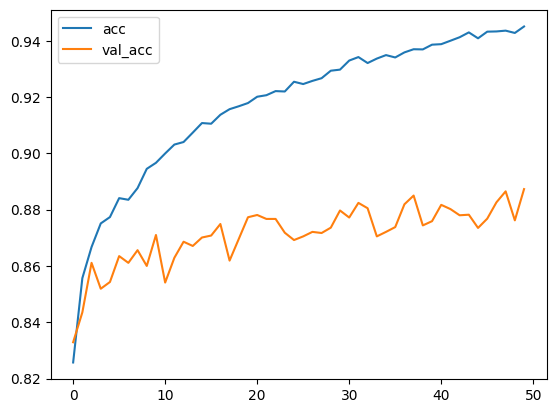

In [16]:


# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()



313/313 [==============================] - 1s 3ms/step
Confusion matrix, without normalization
[[877   5  29   6  11   7   4  14  38   9]
 [ 13 921   2   3   0   1   2   5  16  37]
 [ 47   1 725  30  67  47  51  26   5   1]
 [ 17   8  37 617  51 149  48  50  16   7]
 [ 11   2  28  25 854  16  20  41   2   1]
 [  6   0  22  86  33 788  16  47   1   1]
 [  6   1  18  23  33  11 893   8   5   2]
 [  7   1  11  10  28  26   1 914   1   1]
 [ 38  11   4   3   3   3   3   7 918  10]
 [ 20  48   3   6   1   4   5  12  18 883]]


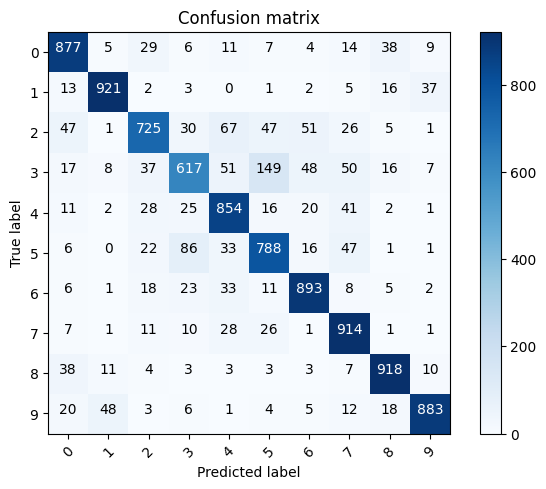

In [10]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [18]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label: bird Predicted: deer')

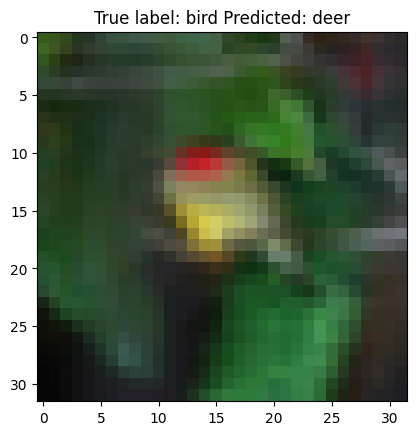

In [19]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))

In [20]:
# Now that the model is so large, it's useful to summarize it
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0     